In [1]:
# Jupyter ipynb file to generate sCSC dendrogram
# B.E. Husic, K.L. Schlueter-Kuck, and J.O. Dabiri
# Stanford University
# 2017-2018
# Instructions: Execute this code by loading in a .npy adjacency matrix
# and choosing the number of eigenvectors to visualize
# Requires sCSC.py file in the same directory

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# The following was written using SciPy Version 0.19.1
import scipy.linalg
from scipy.cluster.hierarchy import average, linkage, fcluster
from scipy.spatial.distance import pdist

In [3]:
from sCSC import *

In [4]:
# Load adjacency matrix
adjacency_matrix = np.load('./protein_g_adjmat.npy')

# Select number of eigenvectors to include in dendrogram analysis
numeigvecs = 7

Split 1 of 7
Split 2 of 7
Split 3 of 7
Split 4 of 7
Split 5 of 7
Split 6 of 7
Split 7 of 7


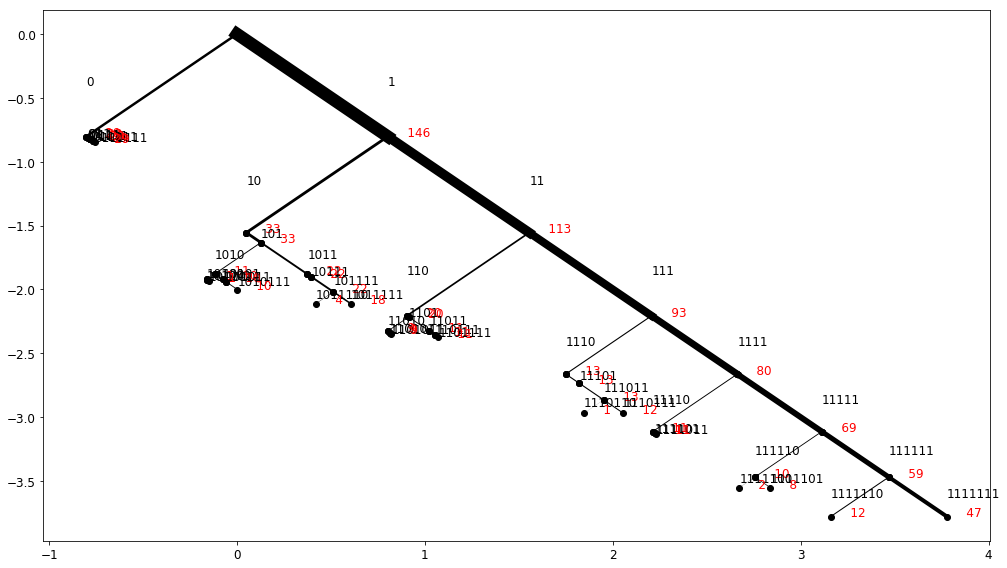

In [5]:
# Obtain eigenvectors for clustering and graph Laplacian
evec, L = get_eigenvectors_for_dendrogram(adjacency_matrix, numeigvecs)

# Get binary codes for each orthogonal process
binary = get_binary_codes(evec, numeigvecs)

# Initialize dendrogram matrices
groupdist, plotcoordsx, plotcoordsy, index_dict = initialize_dendrogram_matrices(numeigvecs)

# Loop through eigenvectors, from largest to last one included in analysis
for split in np.arange(numeigvecs):
    # Output current dendrogram level
    print("Split %i of %i" % (split+1, numeigvecs))
    
    # Initialize level of dendrogram
    row = 0
    
    # Loop through binary codes
    for combos in np.arange(0, 2**(split+1), 2):
        g1label, g2label, Z1count, Z2count, Z1, Z2, index_dict = get_subgroup_similarity(
                                                evec, L, binary, combos, split, index_dict)
        
        # Record dissimilarity metric for group 1
        groupdist[row, split] = Z1
    
        # Record dissimilarity metric for group 2
        groupdist[row+1, split] = Z2
        
        # Plot this level of the dendrogram
        plotcoordsx, plotcoordsy = plot_next_dendrogram_split(
                                   plotcoordsx, plotcoordsy, row, split, adjacency_matrix,
                                   g1label, g2label, Z1count, Z2count, Z1, Z2)
    
        # Advance dendrogram level counter
        row = row + 2

# Optionally add plot specifications
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Optionally save figure
#plt.savefig('dendrogram.pdf')

# Optionally export sCSC Dendrogram distance matrix
# np.save('groupdist.npy', groupdist)

# Optionally save dictionary of member indices
# import pickle
# with open('index_dict.pkl', 'wb') as f:
#     pickle.dump(index_dict, f)